In [93]:
import pandas as pd
import numpy as np
import uncertainties as unc
from uncertainties import unumpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import gamma

In [94]:
def linear_fit(x, a, b):
    return a*x + b

def inverse_linear(y, a, b):
    return (y - b) / a

Chi Squared: 0.39457001423626237
[  164.18386722 60112.25254284]
[5.86249849e+00 3.92292630e+04]


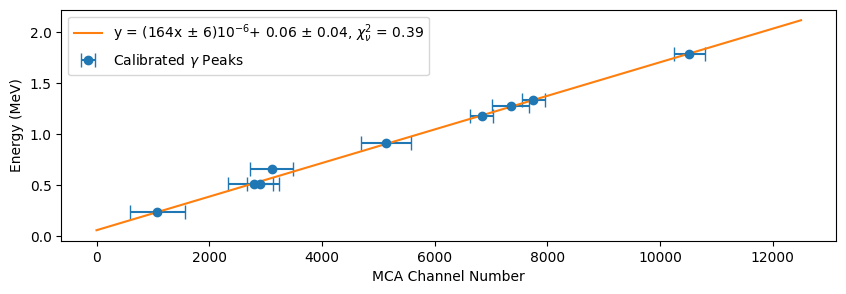

In [95]:
#co60
co60 = pd.read_csv('co60Fits.csv')
trueVals = np.array([1173.2e3, 1332.5e3, 510.99e3, 1274.53e3, 1785.52e3, 238.6e3,  511e3, 911.2e3, 662e3])
mcaChannelsMean = []
mcaChannelsError = []
for i in range(2):
    peaks = 0
    peakList = []
    peakWidths = []
    for j in range(3):
        peaks += unc.ufloat(co60.iloc[j,i*2], co60.iloc[j,(i)*2+1])
        peakList.append(co60.iloc[j,i*2])
        peakWidths.append(co60.iloc[j,(i)*2+1])
    peaks = peaks/3
    # mcaChannelsMean.append(peaks.n)
    # mcaChannelsError.append(peaks.s)
    mcaChannelsMean.append(np.mean(peakList))
    mcaChannelsError.append(np.mean(peakWidths))
na22 = pd.read_csv('na22Fits.csv')

for i in range(3):
    peaks = 0
    peakList = []
    peakWidths = []
    for j in range(3):
        peaks += unc.ufloat(na22.iloc[j,i*2], na22.iloc[j,(i)*2+1])
        peakList.append(na22.iloc[j,i*2])
        peakWidths.append(na22.iloc[j,(i)*2+1])
    peaks = peaks/3
    # mcaChannelsMean.append(peaks.n)
    # mcaChannelsError.append(peaks.s)
    mcaChannelsMean.append(np.mean(peakList))
    mcaChannelsError.append(np.mean(peakWidths))

th232 = pd.read_csv('th232Fits.csv')

for i in range(3):
    peaks = 0
    peakList = []
    peakWidths = []
    for j in range(3):
        peaks += unc.ufloat(th232.iloc[j,i*2], th232.iloc[j,(i)*2+1])
        peakList.append(th232.iloc[j,i*2])
        peakWidths.append(th232.iloc[j,(i)*2+1])
    peaks = peaks/3
    # mcaChannelsMean.append(peaks.n)
    # mcaChannelsError.append(peaks.s)
    mcaChannelsMean.append(np.mean(peakList))
    mcaChannelsError.append(np.mean(peakWidths))

cs137 = pd.read_csv('cs137Fits.csv')
peakList = []
peakWidths = []
for j in range(3):
    peakList.append(cs137.iloc[j,0])
    peakWidths.append(cs137.iloc[j,1])
mcaChannelsMean.append(np.mean(peakList))
mcaChannelsError.append(np.mean(peakWidths))

mcaChannelsMean = np.array(mcaChannelsMean)
mcaChannelsError = np.array(mcaChannelsError)
plt.figure(figsize=(10, 3))
plt.errorbar(mcaChannelsMean, trueVals*1e-6, xerr=mcaChannelsError, fmt='o', capsize=5, label = r"Calibrated $\gamma$ Peaks")
#fitting
popt, pcov = curve_fit(inverse_linear, trueVals, mcaChannelsMean, sigma=mcaChannelsError, absolute_sigma=True)
chi2 = np.sum(np.pow(mcaChannelsMean-inverse_linear(trueVals, *popt), 2)/(np.array(mcaChannelsError)**2))/(len(mcaChannelsMean)-2)
print('Chi Squared:', chi2)
fitUnc = np.sqrt(np.diag(pcov))
print(popt)
print(fitUnc)
label = rf"y = ({popt[0]:.0f}x $\pm$ {fitUnc[0]:.0f})$10^{{-6}}$+ {popt[1]*1e-6:.2f} $\pm$ {fitUnc[1]*1e-6:.2f}, $\chi^2_\nu$ = {chi2:.2f}"
plt.plot(np.linspace(0, 12500, 100), linear_fit(np.linspace(0, 12500, 100), *popt)*1e-6, label=label)
plt.ylabel('Energy (MeV)')
plt.xlabel('MCA Channel Number')
plt.legend()
plt.show()
    

c:\Users\skell\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2553: RuntimeWarning: invalid value encountered in std_dev (vectorized)
  outputs = ufunc(*inputs)


Fit Q min 1.8287120017243264 max 2.055733146086923 MeV
Fit Q 1.9422225739056247 +/- 0.11351057218129834 MeV
Kurie Q min 1.8323530228010638 max 2.057952034322382 MeV
Kurie Q 1.945152528561723 +/- 0.11279950576065911 MeV


C:\Users\skell\AppData\Local\Temp\ipykernel_17368\3239428628.py:18: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(epsilon**2-1)


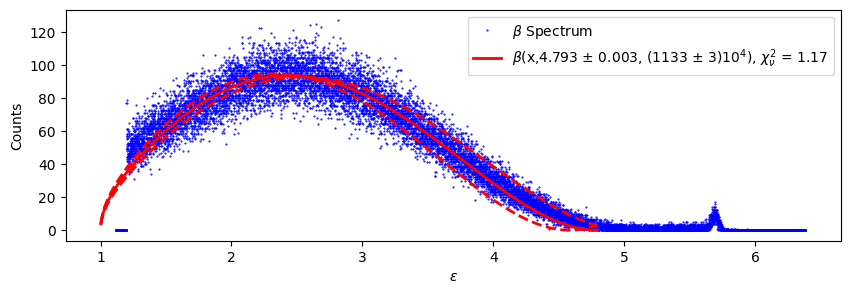

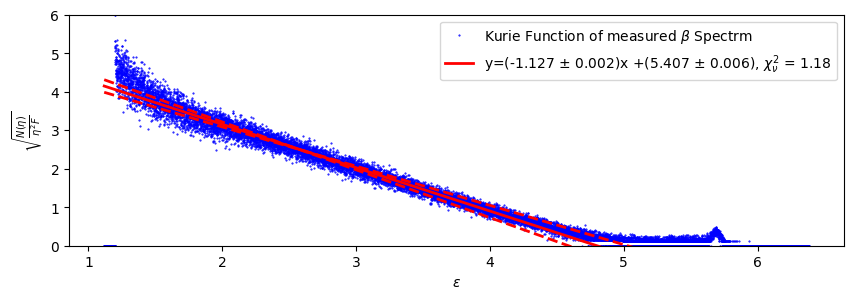

In [135]:
hbar = 6.58211956e-16 # eV*s
e = 1.60217662e-19 # C
c = 299792458 #m/s
me = 0.51099895000e6 # eV/c^2
alpha = 1/137
Z = 53

def s(Z):
    return np.sqrt(1-Z**2/137**2) -1

def delta(z, eta):
    return z*np.sqrt(1+eta**2)/(137*eta)

def fermi(Z, eta):
    return eta**(2*s(Z))*np.exp(np.pi*delta(Z, eta))*np.abs(gamma(1+s(Z)+1j*delta(Z, eta)))**2

def Eta(epsilon):
    return np.sqrt(epsilon**2-1)

def epsilon(eta):
    return np.sqrt(1+eta**2)

def N(eta, Const, Q):
    return Const/(c**2)*eta**2*(Q-epsilon(eta))**2*fermi(Z, eta)


Q = 2.1221/0.51099895069
# etas = np.linspace(0.001,Eta(Q),1000, endpoint=True)
# Ns = N(etas, 1, Q)

# plt.plot(etas, Ns)
# plt.xlabel(r'$\eta$')
# plt.ylabel(r'$N(\eta)$')
# plt.show()
# epsilons = np.linspace(1.001, Q, 1000, endpoint=True)
# etas = Eta(epsilons)
# Ns = N(etas, 1, Q)
# plt.plot(epsilons, Ns)
# plt.xlabel(r'$\epsilon$')
# plt.ylabel(r'$N(\epsilon)$')
# plt.show()

# kurie = np.sqrt(Ns/(etas**2*fermi(Z, etas)))
# plt.figure(figsize=(10,5))
# plt.plot(epsilons, kurie)
# plt.xlabel(r'$\epsilon$')
# plt.ylabel(r'$\sqrt{\frac{N(\eta)}{\eta^2F}}$')
# plt.show()

def betaFit(epsilon, Q, A):
    etas = Eta(epsilon)
    return N(etas, A, Q)*1e10


betaScan = pd.read_csv('Gp3_data_E1/NaI Beta Spectrum/Run6_300s_threshold250.csv', skiprows=6)
betaScan['uncs'] = np.sqrt(betaScan["Counts"]) + 1e-9
energyFits = [popt - fitUnc,  popt + fitUnc, popt]
betaPopts = []
betaPcovs = []
kuriePopts = []
kuriePcovs = []
for i in range(3):
    betaScan["energy"] = linear_fit(betaScan["Channel"], *(energyFits[i]))*1e-6/(0.51099895069)+1

    maxIndex = np.argmin(np.abs(betaScan['energy']-Q)) + 100
    minIdx = np.argmin(np.abs(betaScan['energy']-2))
    minIdx = 251
    popt1, pcov1 = curve_fit(betaFit, betaScan['energy'][minIdx:maxIndex], betaScan['Counts'][minIdx:maxIndex], sigma=betaScan['uncs'][minIdx:maxIndex], p0=[Q, 5e6], bounds = ([Q-1, 1e5], [Q+1, 1e8]), absolute_sigma=True)
    betaPopts.append(popt1)
    betaPcovs.append(np.sqrt(np.diag(pcov1)))
    
    betaFitUnc = np.sqrt(np.diag(pcov1))

    kurie = np.sqrt(betaScan["Counts"]/(Eta(betaScan["energy"])**2*fermi(Z, Eta(betaScan["energy"]))))
    countsWithErr = unumpy.uarray(betaScan["Counts"].to_numpy(), betaScan["uncs"].to_numpy())
    kurieErr = (countsWithErr/(np.pow(Eta(betaScan["energy"]),2)*fermi(Z, Eta(betaScan["energy"]))))
    kurieErr = unumpy.std_devs(unumpy.sqrt(kurieErr))

    popt2, pcov2 = curve_fit(linear_fit, betaScan['energy'][minIdx:maxIndex], kurie[minIdx:maxIndex], sigma=kurieErr[minIdx:maxIndex], absolute_sigma=True)
    kuriePopts.append(popt2)
    kuriePcovs.append(np.sqrt(np.diag(pcov2)))

betaChisq = np.sum(np.pow(betaScan['Counts'][minIdx:maxIndex]-betaFit(betaScan['energy'][minIdx:maxIndex], *popt1), 2)/(np.array(betaScan['uncs'][minIdx:maxIndex])**2))/(len(betaScan['Counts'][minIdx:maxIndex])-2)
kurieChisq = np.sum(np.pow(kurie[minIdx:maxIndex]-linear_fit(betaScan['energy'][minIdx:maxIndex], *popt2), 2)/(np.array(kurieErr[minIdx:maxIndex])**2))/(len(kurie[minIdx:maxIndex])-2)

# print("Fit Q min", (betaPopts[0][0] - betaPcovs[0][0]-1) * 0.51099895069, "max", (betaPopts[1][0] + betaPcovs[1][0]-1)*0.51099895069, "MeV")
fitQMin = (betaPopts[0][0] -1) * 0.51099895069
fitQMax = (betaPopts[1][0]-1)*0.51099895069
print("Fit Q min", fitQMin, "max", fitQMax, "MeV")
fitQ = fitQMin + (fitQMax - fitQMin)/2
fitQStd = (fitQMax - fitQMin)/2
print("Fit Q", fitQ, "+/-", fitQStd, "MeV")
slope = unc.ufloat(kuriePopts[0][0], kuriePcovs[0][0])
intercept = unc.ufloat(kuriePopts[0][1], kuriePcovs[0][1])
q = (-intercept/slope-1)*0.51099895069
kurieQmin = unc.nominal_value(q)# - unc.std_dev(q)
slope = unc.ufloat(kuriePopts[1][0], kuriePcovs[1][0])
intercept = unc.ufloat(kuriePopts[1][1], kuriePcovs[1][1])
q = (-intercept/slope-1)*0.51099895069
kurieQmax = unc.nominal_value(q) #+ unc.std_dev(q)
print("Kurie Q min", kurieQmin, "max", kurieQmax, "MeV")
kurieQ = kurieQmin + (kurieQmax - kurieQmin)/2
kurieQStd = (kurieQmax - kurieQmin)/2
print("Kurie Q", kurieQ, "+/-", kurieQStd, "MeV")
plt.figure(figsize=(10,3))
plt.plot(betaScan['energy'], betaScan['Counts'], "bo", markersize=0.5, label = r"$\beta$ Spectrum")
plt.plot(np.linspace(0,popt1[0], 1000), betaFit(np.linspace(0,popt1[0], 1000), *(betaPopts[2])), "r-", linewidth=2, label = rf"$\beta$(x,{betaPopts[2][0]:.3f} $\pm$ {betaPcovs[2][0]:.3f}, ({(betaPopts[2][1]/1e4):.0f} $\pm$ {(betaPcovs[2][1]/1e4):.0f})$10^4$), $\chi^2_\nu$ = {betaChisq:.2f}")
plt.plot(np.linspace(0,popt1[0], 1000), betaFit(np.linspace(0,popt1[0], 1000), *(betaPopts[1])), "r--", linewidth=2)
plt.plot(np.linspace(0,popt1[0], 1000), betaFit(np.linspace(0,popt1[0], 1000), *(betaPopts[0])), "r--", linewidth=2)

plt.xlabel(r"$\epsilon$")
plt.ylabel("Counts")
plt.legend()
plt.show()


plt.figure(figsize=(10,3))
plt.plot(betaScan["energy"], kurie, "bo", markersize=0.5, label = r"Kurie Function of measured $\beta$ Spectrm")
label = rf"y=({kuriePopts[2][0]:.3f} $\pm$ {kuriePcovs[2][0]:.3f})x +({(kuriePopts[2][1]):.3f} $\pm$ {(kuriePcovs[2][1]):.3f}), $\chi^2_\nu$ = {kurieChisq:.2f}"
plt.plot(betaScan['energy'], linear_fit(betaScan['energy'], *(kuriePopts[2])), "r-", linewidth=2, label=label)
plt.plot(betaScan['energy'], linear_fit(betaScan['energy'], *(kuriePopts[1])), "r--", linewidth=2)
plt.plot(betaScan['energy'], linear_fit(betaScan['energy'], *(kuriePopts[0])), "r--", linewidth=2)
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\sqrt{\frac{N(\eta)}{\eta^2F}}$")
plt.ylim(0,6)
plt.legend()
plt.show()
    
    

